# Name : Aditya Shyamanand Mishra
# UIN : 211P001
# Roll No. : 25
# Branch : Comps

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv('./placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


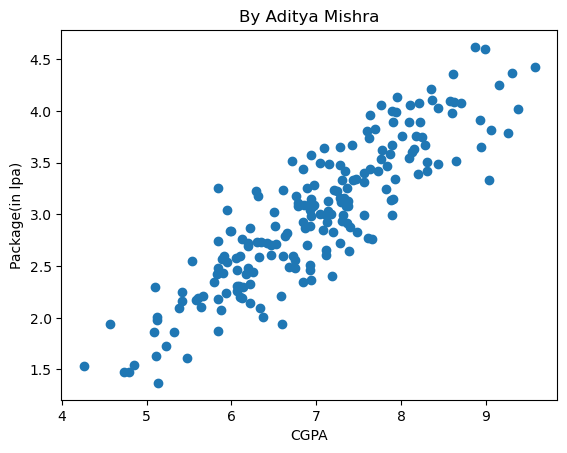

In [ ]:

# plotting the scatter plot
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA') # setting x label
plt.ylabel('Package(in lpa)') # setting y label
plt.title('By Aditya Mishra')
plt.show()

In [ ]:
class LinearRegression:
  def __init__(self):
    self.m = None
    self.c = None
  def fit(self,x_train,y_train):
    num, den = 0,0
    x_mean, y_mean = x_train.mean(), y_train.mean()
    for i in range(len(x_train)):
      num = num + ((x_train[i]-x_mean)*(y_train[i]-y_mean))
      den = den + ((x_train[i]-x_mean)**2)
    m = num/den
    c = y_mean - (m*x_mean)
    self.m = m
    self.c = c
  def predict(self,x_test):
    if self.m is None or self.c is None:
      print('Model is not trained yet, Call the fit method.')
      return None
    return self.m*x_test + self.c

In [ ]:
from sklearn.model_selection import train_test_split
# Getting cgpa values as X and pacakge as Y
X, Y= df.iloc[:,0], df.iloc[:,1]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

lr_model = LinearRegression()
lr_model.fit(np.array(X_train).reshape(-1,1),np.array(Y_train).reshape(-1,1))
Y_pred = lr_model.predict(np.array(7).reshape(-1, 1))
print(Y_pred)

[[3.00470589]]


In [ ]:
import tkinter as tk
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
root = tk.Tk()
root.title("Package (in LPA) Prediction")
root.geometry('800x400')

fig = Figure(figsize=(8, 6))
scatter_plot = fig.add_subplot(111)

def predict_package():
    try:
        cgpa = float(entry_cgpa.get())

        predicted_package = lr_model.predict([[cgpa]])

        label_prediction.config(text=f"Predicted Package: {predicted_package[0][0]:.2f} LPA")

    except ValueError:
        label_prediction.config(text="Please enter a valid CGPA")

label_cgpa = tk.Label(root, text="Enter CGPA:")
label_cgpa.pack(pady=10)

entry_cgpa = tk.Entry(root, width=10)
entry_cgpa.pack()

button_predict = tk.Button(root, text="Predict Package", command=predict_package)
button_predict.pack(pady=10)

label_prediction = tk.Label(root, text="")
label_prediction.pack(pady=10)

scatter_plot.scatter(df['cgpa'], df['package'])
scatter_plot.plot(X_train, lr_model.predict(np.array(X_train).reshape(-1,1)),  color='orange')
scatter_plot.set_xlabel('CGPA')
scatter_plot.set_ylabel('Package')
scatter_plot.set_title('Package Prediction based on CGPA  By Aditya Mishra')

canvas = FigureCanvasTkAgg(fig, master=root)
canvas.draw()
canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

tk.mainloop()